# Experiment 2 - Internal variable growth

### Read the data from csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv("exp2_internal_variable_growth_data.csv")

print("Experiment data analysis - Internal variable growth")
print("Number of samples:", df["n_sample"].max())
print("Number of RDDAs by sample:", df["n_network"].max())
print("Number of RDDs by RDDA:", df["n_rdds"][0])
print("Range of internal variables:", df["n_variables"].min(),"-", df["n_variables"].max())
print("Number of Coupling Signals:", df["n_coupling_signals"][0])
df.head(20)

Experiment data analysis - Internal variable growth
Number of samples: 50
Number of RDDAs by sample: 6
Number of RDDs by RDDA: 5
Range of internal variables: 5 - 10
Number of Coupling Signals: 2


,n_sample,n_network,n_rdds,n_variables,n_coupling_signals,n_rdda_attractors,t_find_attractors_method,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
0,1,1,5,5,2,43,1.697125,310,0.107261,16,0.354249
1,1,2,5,6,2,62,1.083199,601,0.150357,70,1.636634
2,1,3,5,7,2,88,1.864858,1175,0.294080,130,5.961298
3,1,4,5,8,2,74,2.210532,871,0.221948,12,0.276686
4,1,5,5,9,2,60,1.794353,629,0.145120,97,0.869504
5,1,6,5,10,2,136,4.675034,2810,0.812161,940,237.360272
6,2,1,5,5,2,53,1.012354,466,0.114237,24,0.971192
7,2,2,5,6,2,49,0.936299,444,0.097875,41,0.793131
8,2,3,5,7,2,52,1.100527,434,0.099267,70,1.277645
9,2,4,5,8,2,55,1.456774,519,0.116463,31,0.875745


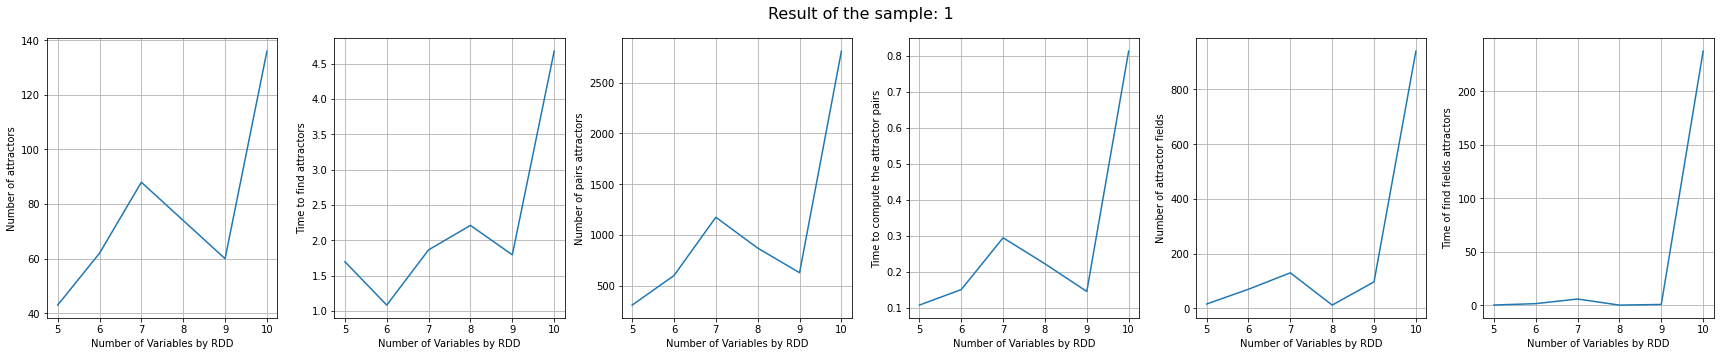

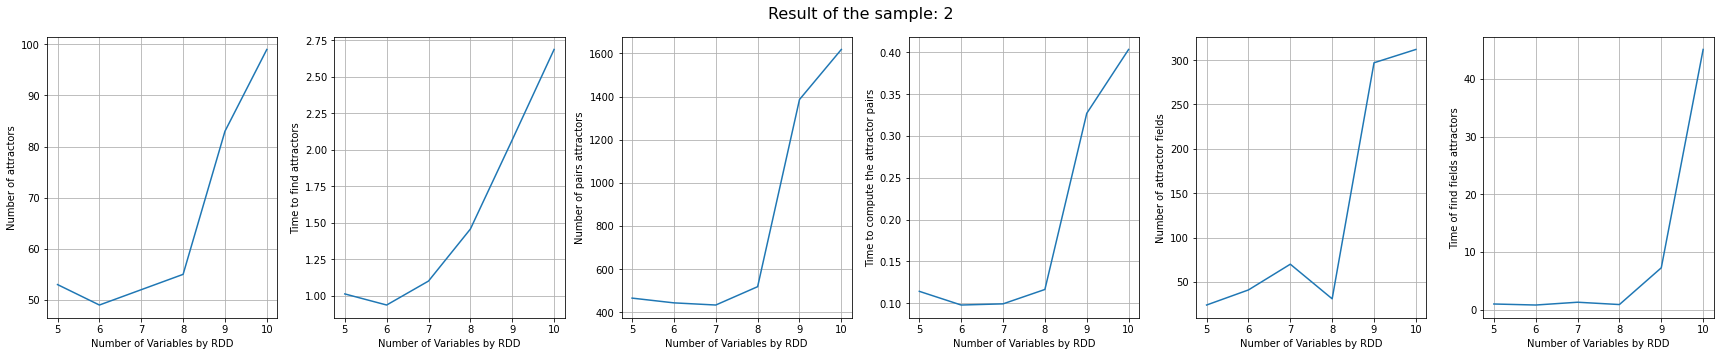

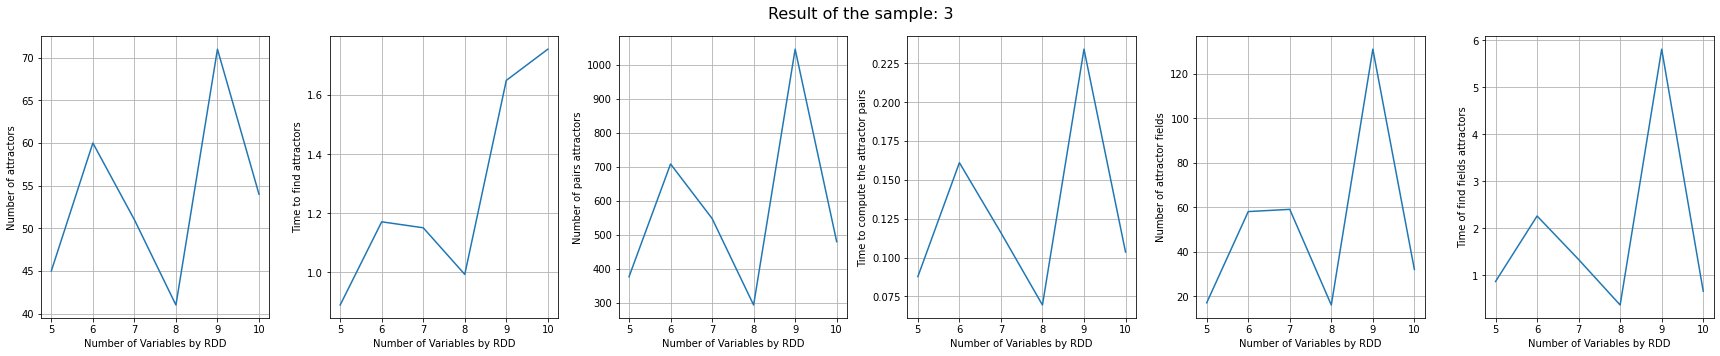

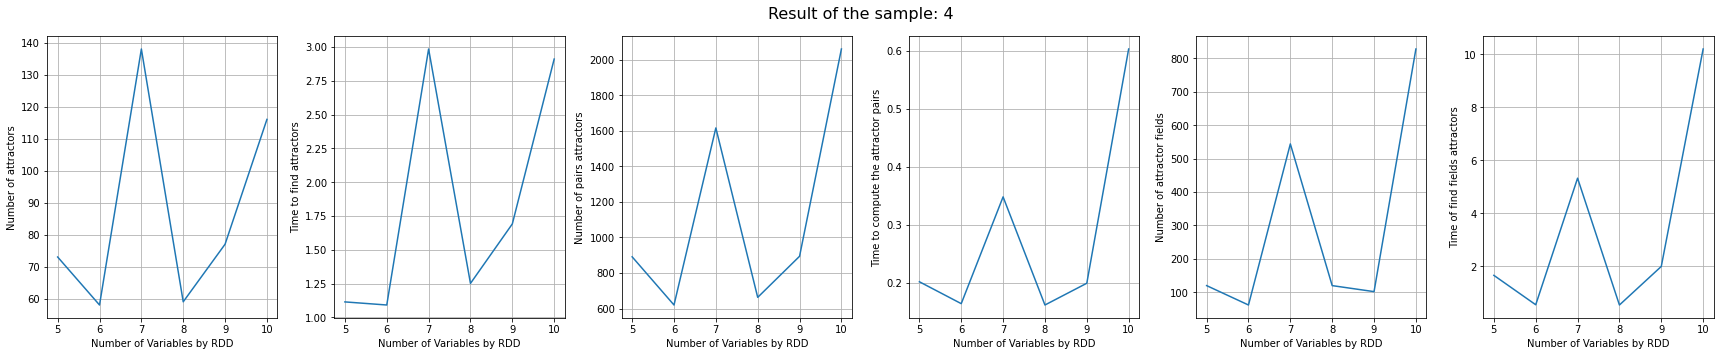

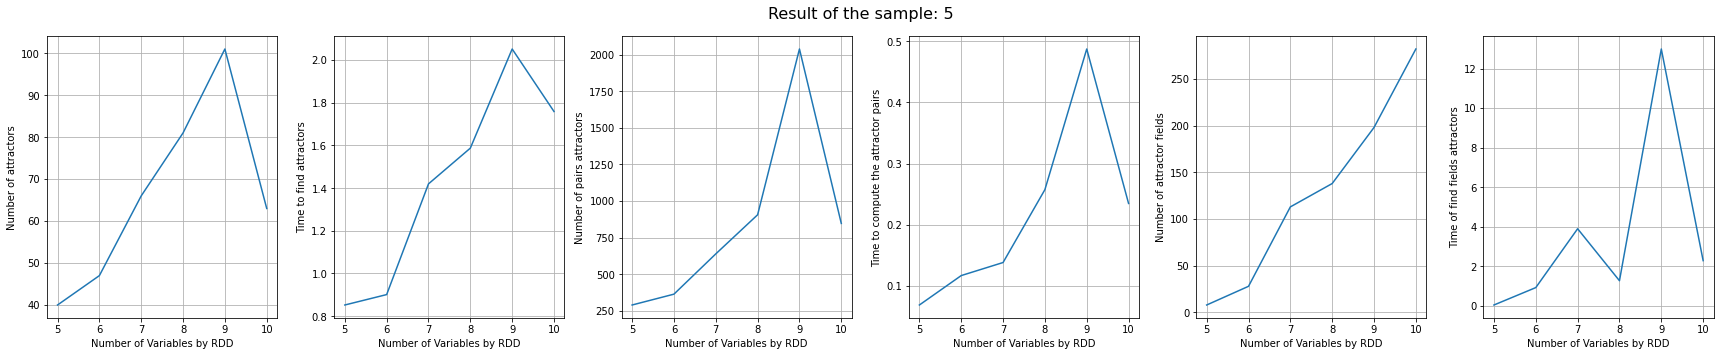

In [2]:
l_labels_y = ["Number of attractors", "Time to find attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor fields", "Time of find fields attractors"]

grouped = df.groupby("n_sample")
labels = {key:label for key, label in zip(df.keys()[5:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}

for number in np.array(list(grouped.groups.keys()))[:5]:
    group = grouped.get_group(number)
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    for (ax, key) in zip(axs, group.keys()[5:]):
        ax.plot(group['n_variables'], group[key])
        ax.set_xlabel('Number of Variables by RDD')
        ax.set_ylabel(labels[key])
        ax.grid(True)
    fig_.suptitle('Result of the sample: ' + str(number), fontsize=16)
    fig_.tight_layout()

### Boxplot for every indicator - General vision

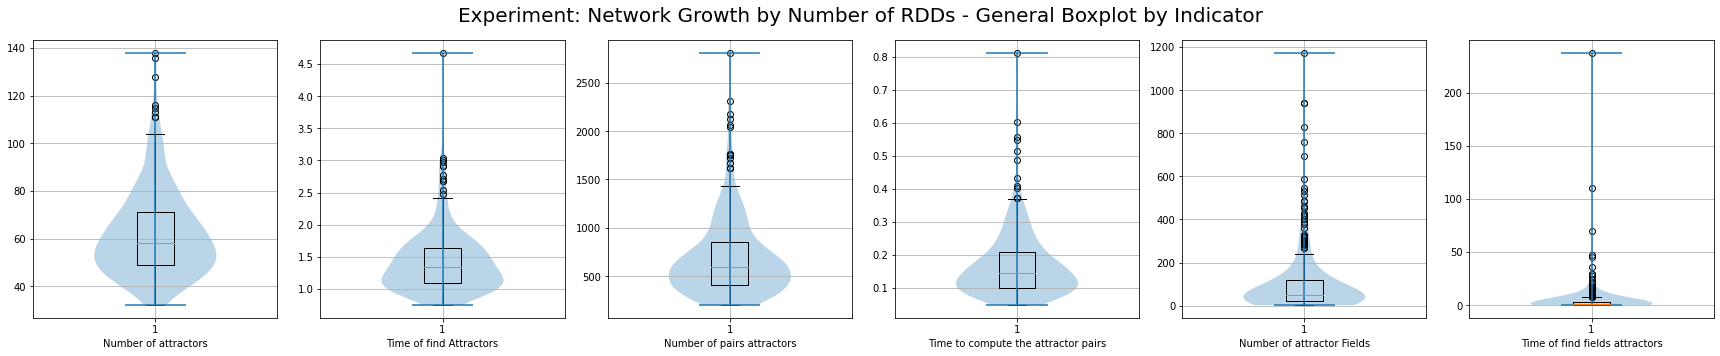

In [3]:
# General Boxplot by Indicator
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]

fig_, axs = plt.subplots(1,6,figsize=(24,5))
cont_label = 0
for (key,ax) in zip(df.keys()[5:], axs):
    ax.boxplot(df[key])
    ax.violinplot(df[key])
    ax.set_xlabel(l_labels_y[cont_label])
    ax.grid(True)
    cont_label += 1
fig_.suptitle('Experiment: Network Growth by Number of RDDs - General Boxplot by Indicator', fontsize=20)
fig_.tight_layout()

### Boxplot for every Indicator - Indicator across all the samples for every number of variables

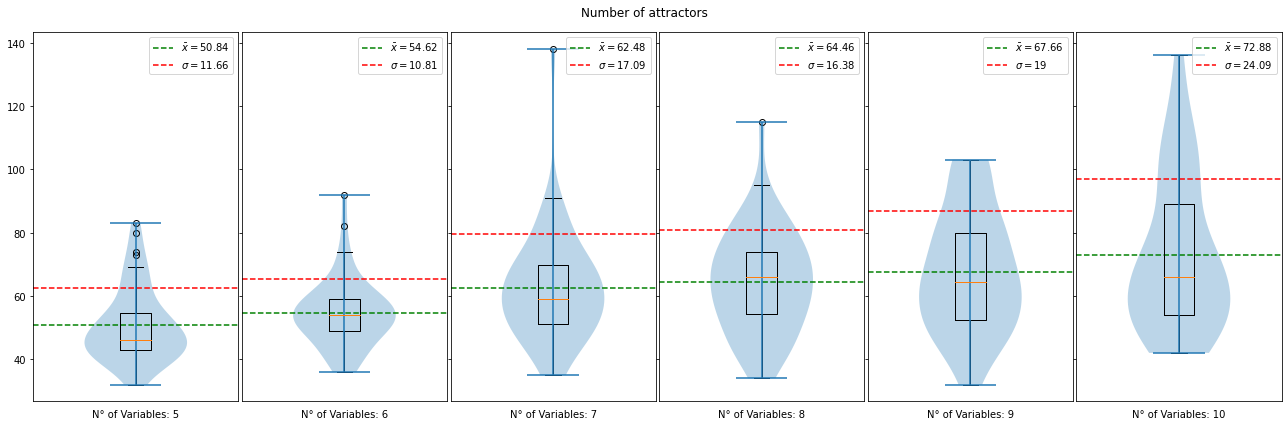

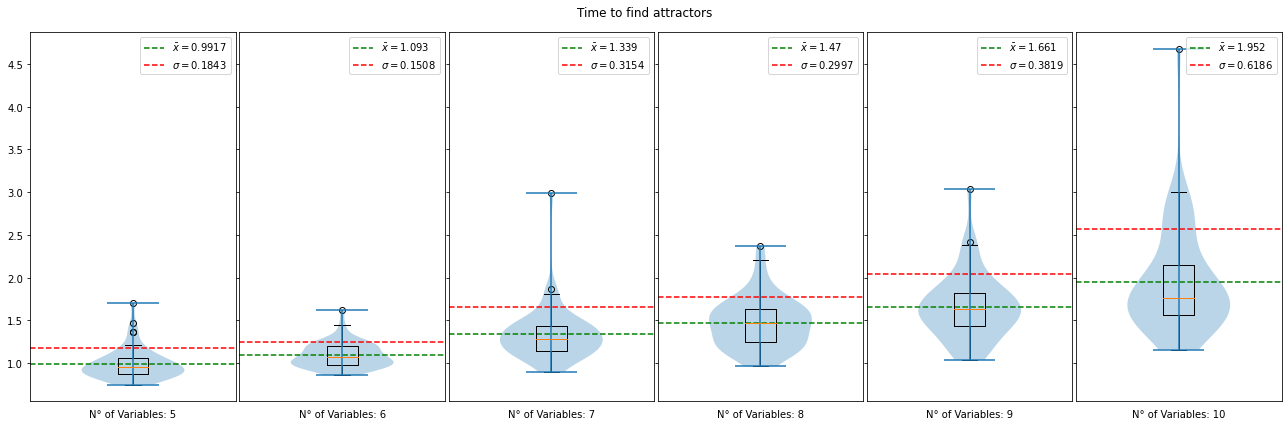

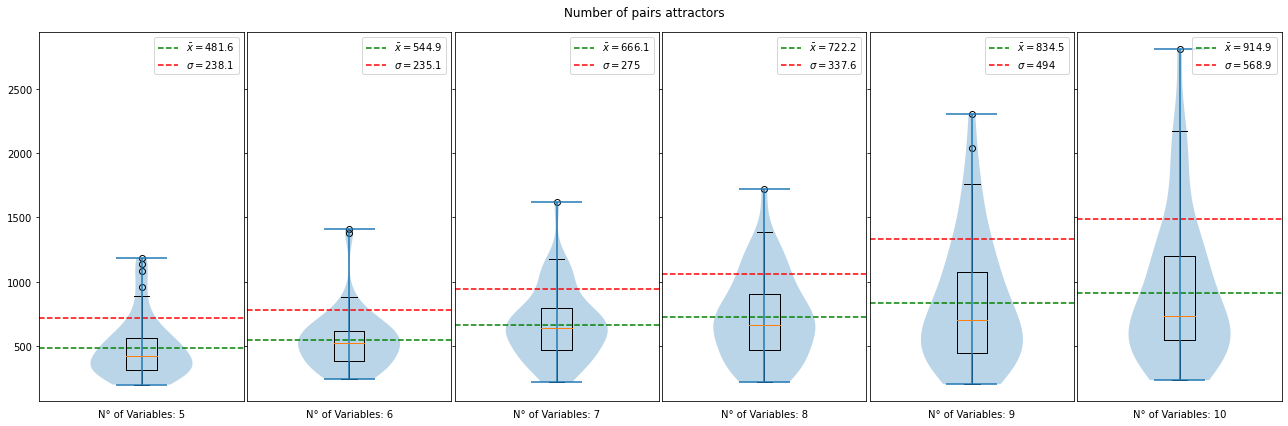

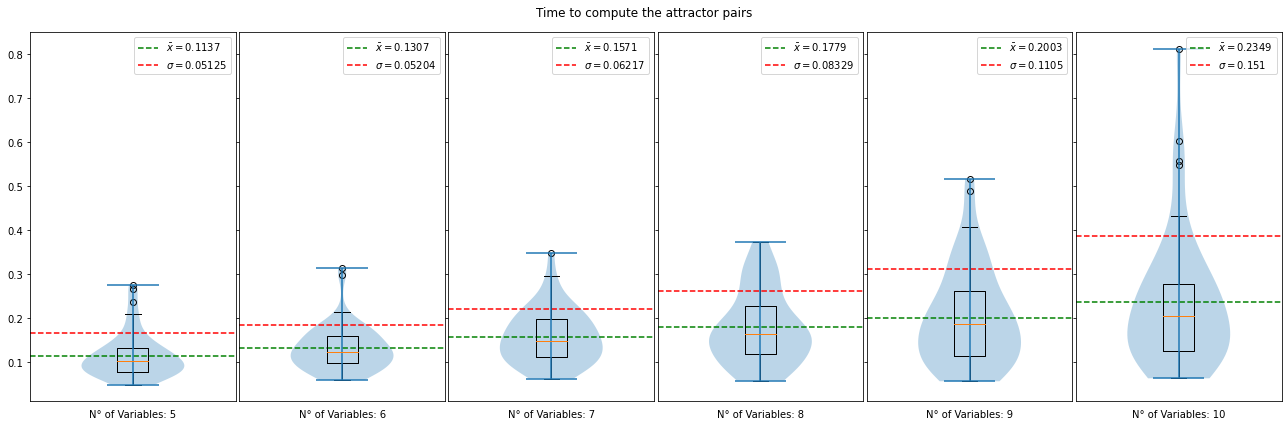

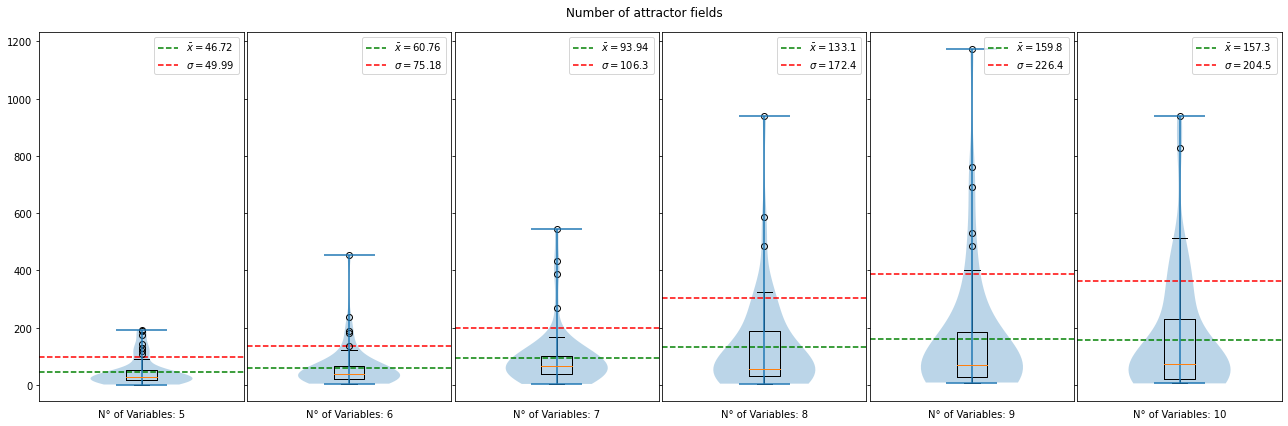

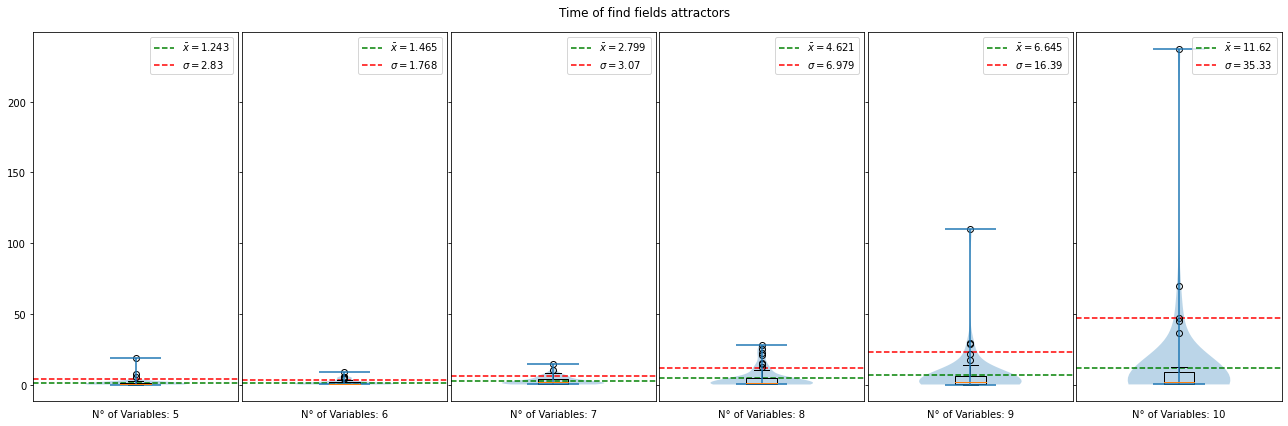

In [4]:
n_variables = df['n_variables'].unique()
labels = {key:label for key, label in zip(df.keys()[5:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}
log_scale = {key:label for key, label in zip(df.keys()[5:], [
          False,
          False,
          True,
          True,
          True,
          True])}
grouped = df.groupby("n_variables")

for key in df.keys()[5:]:
    fig, axs = plt.subplots(1, n_variables.size, figsize=(n_variables.size*3,6), sharey=True)
    for ax, n_variable in zip(axs, n_variables):
        group = grouped.get_group(n_variable)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        #std_min = ax.axhline(y=data.mean()-data.std(), xmin=0.0, xmax=1.0, color='r',ls='--')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        #if log_scale[key]:
        #ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of Variables: {n_variable}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)